<a href="https://colab.research.google.com/github/harishmuh/Deep-Learning_study/blob/main/CNN_tensorflow_iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Convolutional Neural Network (CNN) - Iris flower Classififcation**

---

![iris](https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg)

### **Context**

This tutorial is the continuation of previous iris flower identification with MLP tutorial. You can see the previous tutorial [here](https://github.com/harishmuh/Deep-Learning-Specialization---Andrew-Ng/blob/main/MLP_tensorflow_iris_flower.ipynb).  

For this tutorial, we explore how to apply a Convolutional Neural Network (CNN) to structured tabular data. While CNNs are most effective for image processing, they can also be adapted for low-dimensional structured inputs.

### **About dataset**

The Iris dataset is a classical supervised classification dataset containing 150 samples of iris flowers across three species.

**Dataset Characteristics:**

Total samples: 150

Number of features: 4

Number of classes: 3

Type: Supervised multi-class classification

Features:

* Sepal length (cm)

* Sepal width (cm)

* Petal length (cm)

* Petal width (cm)

Target Classes:

* 0 → Setosa

* 1 → Versicolor

* 2 → Virginica

### **Convolutional Neural Network (CNN)**

CNN is a deep learning method to detect object, sound recoignizer, and language translation. In general, CNN can detect pattern in 2d (image) input and produce output as a categorical (classification problem) or real value (regression problem),


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

# style
plt.style.use('ggplot')


**Loading dataset**

In [2]:
# Loading iris dataset
uci_datasets = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(uci_datasets, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# data dimension
df.shape

(150, 5)

In [4]:
# Rename columns
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Defining features and target**

In [5]:
# Features and targets
X = df.drop('class', axis=1)
y = df['class']

In [6]:
# Replacing values using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1 = le.fit_transform(y)
y = pd.get_dummies(y1).values

In [7]:
# Check y
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

**Data splitting**

We use 80% of data as training set and 20% of data as testing set.

In [8]:
# Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Check shape
print('Data Training: ')
print(X_train.shape)
print(y_train.shape)
print('Data Testing: ')
print(X_test.shape)
print(y_test.shape)

Data Training: 
(120, 4)
(120, 3)
Data Testing: 
(30, 4)
(30, 3)


Currently we have 2D input data. However, CNN expect 3D input. So, we need to reshape our data.

**Reshaping input dimension**

We will add dimension to the 2D dimension of X_train and X_test from ((120, 4) and (30, 4, 1)) into 3D ((120, 4, 1) and (30, 4, 1)).

In [10]:
# Reshaping X_train from 2D into 3D
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train_reshaped.shape

(120, 4, 1)

In the 3D dimension of 120, 4, 1 means:
* 120 for number of samples
* 4 for timesteps
* 1 for 1 variable or number of feature

In [11]:
# Reshaping X_test from 2D into 3D
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_reshaped.shape

(30, 4, 1)

**CNN - 1D**

**Model building**

Firstly, we need to set input layer. we use tf.keras.Sequential() for sequentially process.

In [12]:
# Setting input layer

# Define input step
n_timesteps = X_train_reshaped.shape[1] # n_timesteps = 4
n_features = X_train_reshaped.shape[2]  # n_features = 1

# Build sequential model
modelCNN = tf.keras.Sequential()

# Input layer initiation
modelCNN.add(tf.keras.layers.Input(shape=(n_timesteps, n_features)))

We need to add hidden layer. Hidden layer in CNN consist of convultion layer, pooling layer, and fully connected layer.

In [13]:
# Hidden layer initiation

# Convolution layer
modelCNN.add(tf.keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_1")) # 16 filters: the number of feature map

# Pooling layer
modelCNN.add(tf.keras.layers.MaxPooling1D(pool_size=2)) # Initiating max pooling size
modelCNN.add(tf.keras.layers.Flatten()) # Flatting into one vector

# Fully connected layer settings
modelCNN.add(tf.keras.layers.Dense(32, activation='relu')) # 32 neuron # Activation function --> Relu

We use convolution layer for model to learn local interaction between neighboring features.

We use pooling layer to reduce dimensionality and to keep stronger feature activations. We use flatten to convert the shape into standard vector


In [14]:
# Output layer
modelCNN.add(tf.keras.layers.Dense(3, activation='softmax'))

When setting the output layer, we use 3 neurons for 3 iris class prediction. We use softmax because we want to do multiclass task classification. The softmax function also help us learn the distribution probability of the class.

After designing the CNN architecture, now we need to compile it. We use Adam as optimizer with learning rate 0.01, and the loss that we want to be minimized is categorical_crossentropy (because we want to solve multi class problem). The categorical_cross entropy requires one-hot encoded labels. If labels are integers, we may need to use sparse_categorical_crossentropy.

In [15]:
# Compiling model
modelCNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

modelCNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1D_1 (Conv1D)               │ (None, 3, 16)          │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691 (2.70 KB)

 Trainable params: 691 (2.70 KB)

 Non-trainable params: 0 (0.00 B)

So, we will train 691 parameters.

If we dont set the inital layer name, tensorflow will give random name to the layer.

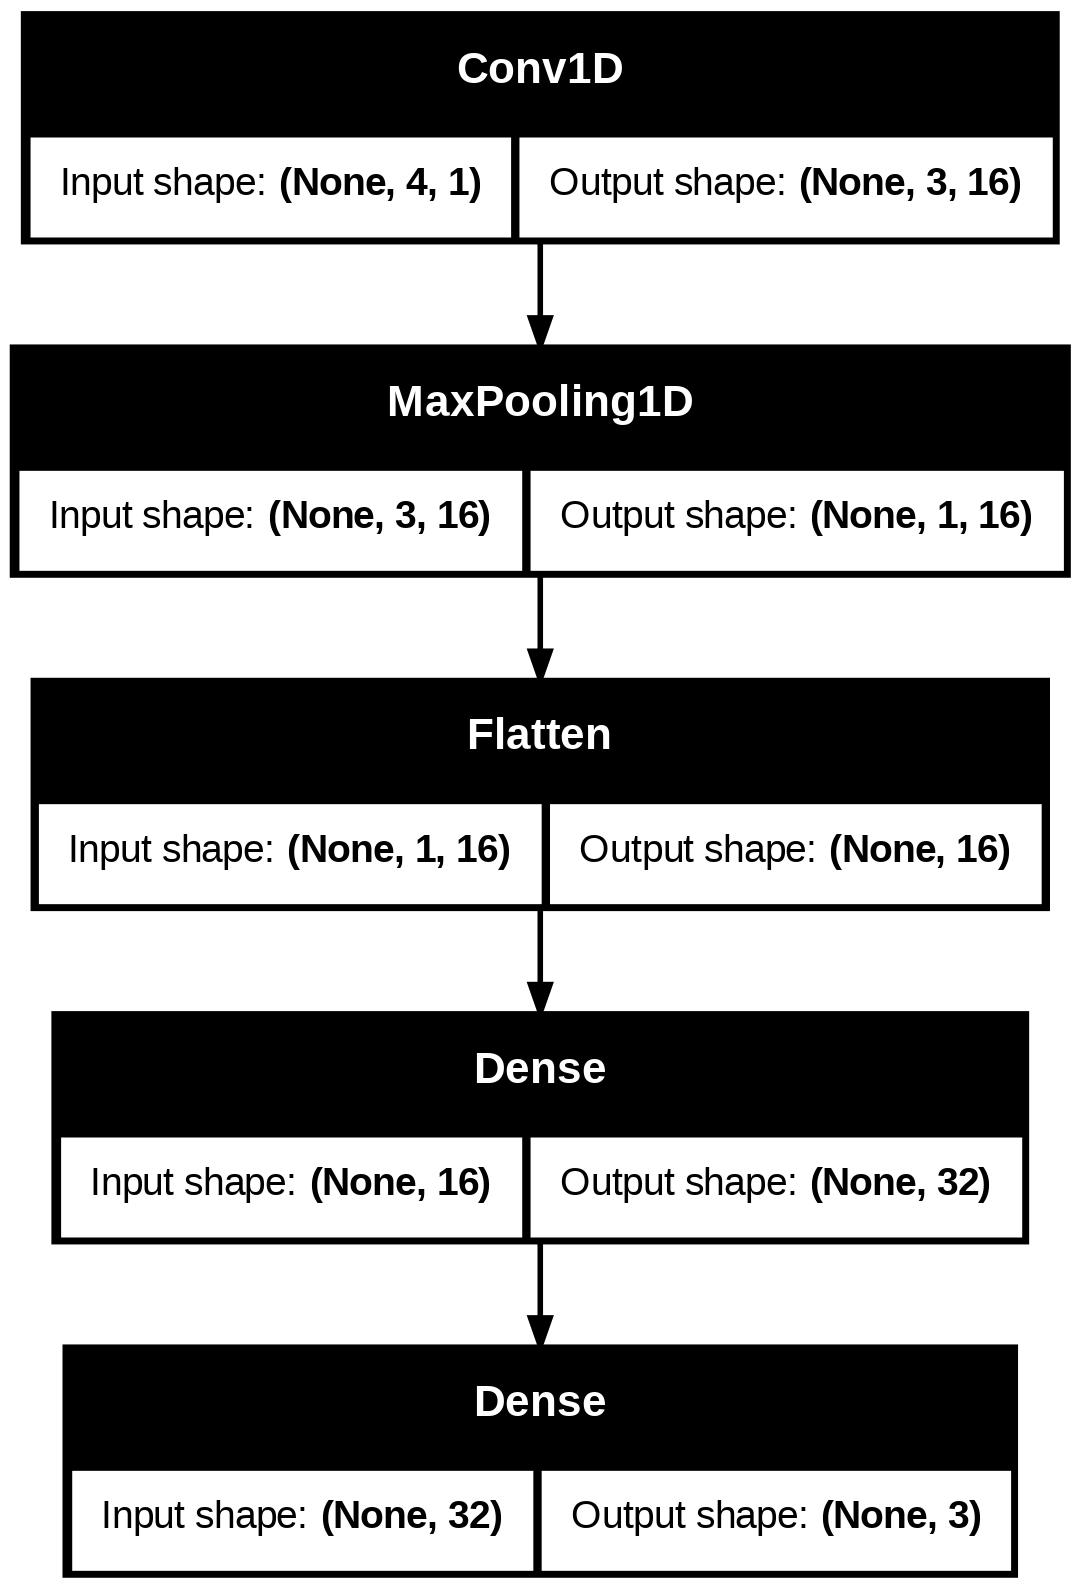

In [16]:
plot_model(modelCNN, 'modelCNN.png', show_shapes=True)

**Model training**

We will train the model for 100 epochs and use 20% of data for data validation.

In [17]:
historyCNN = modelCNN.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.2487 - loss: 1.9114 - val_accuracy: 0.2917 - val_loss: 1.1599
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4531 - loss: 1.1339 - val_accuracy: 0.2917 - val_loss: 1.1074
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.3919 - loss: 1.0445 - val_accuracy: 0.2917 - val_loss: 1.2428
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4076 - loss: 1.0270 - val_accuracy: 0.2917 - val_loss: 1.1932
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4622 - loss: 0.9261 - val_accuracy: 0.5417 - val_loss: 1.0623
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7318 - loss: 0.8894 - val_accuracy: 0.5417 - val_loss: 0.9352
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7318 - loss: 0.8520 - val_accuracy: 0.6250 - val_loss: 0.8590
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6159 - loss: 0.8111 - val_accuracy: 0.7917 - val_loss

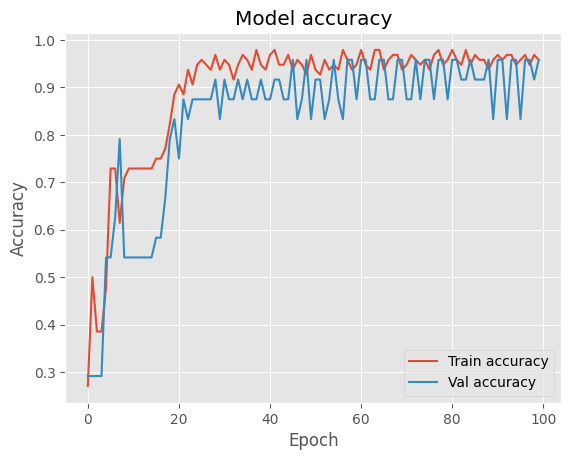

In [18]:
# Plotting accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Val accuracy'], loc='lower right')
plt.show()

The model accuracy increases rapidly during the first 20–30 epochs. Afterward, both training and validation accuracy stabilize around 95–98%, with only minor fluctuations in validation performance. The small gap between training and validation accuracy suggests good generalization with no significant overfitting.

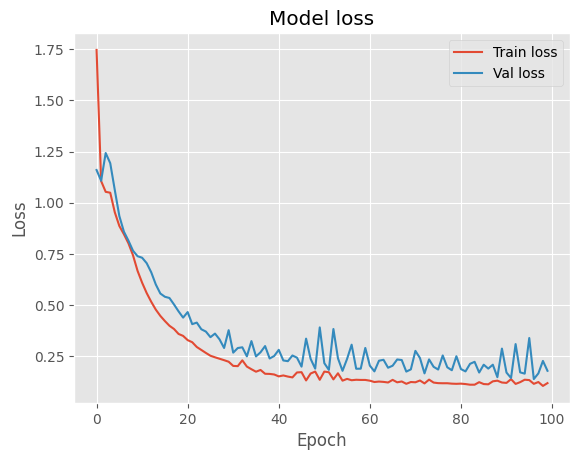

In [19]:
# Plotting loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], loc='upper right')
plt.show()

The training and validation loss decrease rapidly during the initial epochs, indicating that the model is learning effectively and converging. After around 30–40 epochs, the loss stabilizes at a low value, with validation loss showing slight fluctuations due to the small dataset size. The relatively small gap between training and validation loss suggests good generalization without significant overfitting.

**Predicting on testing data**

In [20]:
y_pred_CNN = modelCNN.predict(X_test_reshaped)
y_pred_CNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[9.0530915e-07, 3.4999136e-02, 9.6499997e-01],
       [1.6786026e-04, 9.3096733e-01, 6.8864703e-02],
       [9.9057543e-01, 9.4243279e-03, 2.0620951e-07],
       [2.3447425e-10, 3.2211482e-04, 9.9967790e-01],
       [9.9923742e-01, 7.6258642e-04, 5.3651443e-09],
       [4.9068287e-09, 1.1217848e-03, 9.9887812e-01],
       [9.9855822e-01, 1.4417322e-03, 1.4544931e-08],
       [1.4505755e-04, 9.3225968e-01, 6.7595288e-02],
       [3.5043988e-05, 7.0421541e-01, 2.9574963e-01],
       [8.8450621e-04, 9.9315166e-01, 5.9638014e-03],
       [4.5704955e-09, 1.1214382e-03, 9.9887860e-01],
       [4.1698496e-04, 9.7943270e-01, 2.0150259e-02],
       [4.7106827e-05, 5.4686797e-01, 4.5308489e-01],
       [8.8893416e-05, 8.4763342e-01, 1.5227769e-01],
       [7.2169205e-05, 6.4529949e-01, 3.5462832e-01],
       [9.9921745e-01, 7.8256469e-04, 5.0906981e-09],
       [1.9098877e-04, 8.6387712e-01, 1.3593186e-01],
       [9.5799223e-05, 5.8407295e-01, 4.1583127e-01],
       [9.9907494e-01, 9.250

Replacing original label into numerical form

In [21]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [22]:
y_pred_CNN = np.argmax(y_pred_CNN, axis=1)
y_pred_CNN

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy on test data
print('Accuracy on the test data', accuracy_score(y_test_class, y_pred_CNN))

Accuracy on the test data 1.0


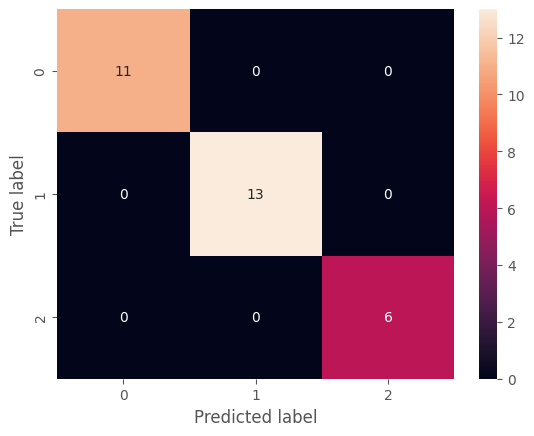

In [26]:
# Confusion matrix visualization heatmap
cm = confusion_matrix(y_test_class, y_pred_CNN)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Both confusion matrix and the high accuracy of 100% show there is no misclassification.

**Conclusion**

The high accuracy of the CNN model indicates the capability of model to learn. However, given the small dataset size, this result should be intrepreted cautiously as it may reflect dataset simplicity.